100%|██████████| 26421880/26421880 [00:49<00:00, 530275.40it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 358299.20it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:04<00:00, 1056887.87it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw

Epoch [1/20], Loss: 0.0292
Epoch [2/20], Loss: 0.0247
Epoch [3/20], Loss: 0.0240
Epoch [4/20], Loss: 0.0229
Epoch [5/20], Loss: 0.0206
Epoch [6/20], Loss: 0.0219
Epoch [7/20], Loss: 0.0231
Epoch [8/20], Loss: 0.0239
Epoch [9/20], Loss: 0.0233
Epoch [10/20], Loss: 0.0267
Epoch [11/20], Loss: 0.0209
Epoch [12/20], Loss: 0.0204
Epoch [13/20], Loss: 0.0249
Epoch [14/20], Loss: 0.0213
Epoch [15/20], Loss: 0.0238
Epoch [16/20], Loss: 0.0221
Epoch [17/20], Loss: 0.0218
Epoch [18/20], Loss: 0.0198
Epoch [19/20], Loss: 0.0230
Epoch [20/20], Loss: 0.0228


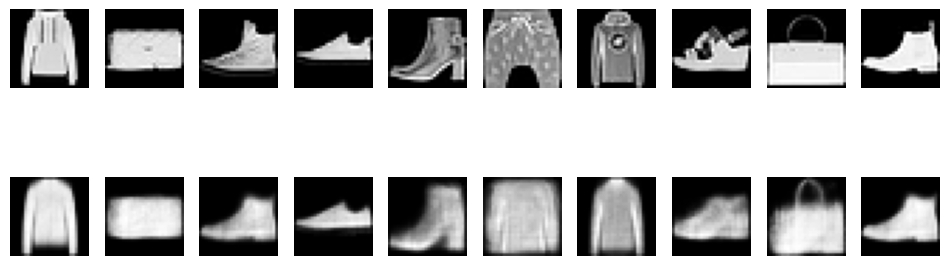

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Load the Fashion MNIST Dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 2. Define the Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)  # Encoded representation
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()  # Output values between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 3. Model, Loss Function, and Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 4. Training the Autoencoder
num_epochs = 20
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1).to(device)
        
        # Forward pass
        output = model(img)
        loss = criterion(output, img)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 5. Visualizing Original and Reconstructed Images
test_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_imgs, _ = next(iter(test_loader))
test_imgs_flat = test_imgs.view(test_imgs.size(0), -1).to(device)
reconstructed = model(test_imgs_flat)

# Convert back to image format for visualization
test_imgs = test_imgs.view(-1, 1, 28, 28)
reconstructed = reconstructed.view(-1, 1, 28, 28).cpu().detach()

# Plot original and reconstructed images
fig, axes = plt.subplots(2, 10, figsize=(12, 4))
for i in range(10):
    axes[0, i].imshow(test_imgs[i].squeeze(), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed[i].squeeze(), cmap='gray')
    axes[1, i].axis('off')
plt.show()


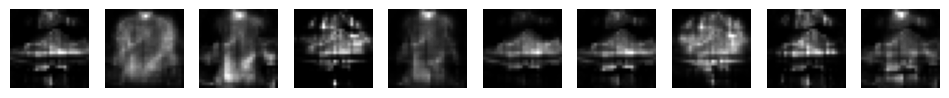

In [3]:
import torch
import matplotlib.pyplot as plt

# Assuming 'model' is your trained autoencoder
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Generate random latent vectors (e.g., 10 samples in a 3-dimensional latent space)
latent_vectors = torch.randn((10, 3)).to(device)

# Feed latent vectors into the decoder to generate new data
with torch.no_grad():
    new_data = model.decoder(latent_vectors)

# Reshape generated data to image format (batch_size, 1, 28, 28)
new_data_images = new_data.view(-1, 1, 28, 28).cpu()

# Plot the generated images
fig, axes = plt.subplots(1, 10, figsize=(12, 4))
for i in range(10):
    axes[i].imshow(new_data_images[i].squeeze(), cmap='gray')
    axes[i].axis('off')
plt.show()
